In [1]:
# importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset extracted after missing value imputation
df = pd.read_csv('../data/gurgaon_properties(missing_value_imputation).csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.29,9021.0,3,3,3,7.0,Relatively New,1540.0,1,0,0,0,0,2,174
1,flat,ireo the grand arch,sector 58,2.20,16000.0,2,2,1,5.0,Relatively New,1528.0,0,0,0,1,0,1,49
2,flat,ireo victory valley,sector 67,2.95,12110.0,3,3,3+,14.0,Moderately Old,2236.0,0,1,0,1,0,1,165
3,flat,puri emerald bay,sector 104,2.23,9911.0,3,4,3+,10.0,Relatively New,2360.0,0,1,0,0,0,1,159
4,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,Relatively New,1548.0,0,0,0,0,0,2,0


In [4]:
df.shape

(3603, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3603 non-null   object 
 1   society          3603 non-null   object 
 2   sector           3603 non-null   object 
 3   price            3603 non-null   float64
 4   price_per_sqft   3603 non-null   float64
 5   bedRoom          3603 non-null   int64  
 6   bathroom         3603 non-null   int64  
 7   balcony          3603 non-null   object 
 8   floorNum         3603 non-null   float64
 9   agePossession    3603 non-null   object 
 10  built_up_area    3603 non-null   float64
 11  study room       3603 non-null   int64  
 12  servant room     3603 non-null   int64  
 13  store room       3603 non-null   int64  
 14  pooja room       3603 non-null   int64  
 15  others           3603 non-null   int64  
 16  furnishing_type  3603 non-null   int64  
 17  luxury_score  

In the building the prediction model for predicting the property price we don't require the society and price_per_sqft columns

In [6]:
train_df = df.drop(columns=['society', 'price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 90,1.29,3,3,3,7.0,Relatively New,1540.0,1,0,0,0,0,2,174
1,flat,sector 58,2.20,2,2,1,5.0,Relatively New,1528.0,0,0,0,1,0,1,49
2,flat,sector 67,2.95,3,3,3+,14.0,Moderately Old,2236.0,0,1,0,1,0,1,165
3,flat,sector 104,2.23,3,4,3+,10.0,Relatively New,2360.0,0,1,0,0,0,1,159
4,flat,sector 108,0.70,2,2,3,1.0,Relatively New,1548.0,0,0,0,0,0,2,0


In [8]:
train_df.select_dtypes(exclude='object')

,price,bedRoom,bathroom,floorNum,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,1.29,3,3,7.0,1540.0,1,0,0,0,0,2,174
1,2.20,2,2,5.0,1528.0,0,0,0,1,0,1,49
2,2.95,3,3,14.0,2236.0,0,1,0,1,0,1,165
3,2.23,3,4,10.0,2360.0,0,1,0,0,0,1,159
4,0.70,2,2,1.0,1548.0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3598,0.95,2,1,1.0,1188.0,0,0,0,0,0,2,59
3599,0.91,2,2,1.0,1223.0,1,0,0,0,0,2,72
3600,1.50,3,3,11.0,1676.0,0,0,0,0,0,2,39
3601,1.55,3,3,5.0,1429.0,0,0,0,1,0,2,99


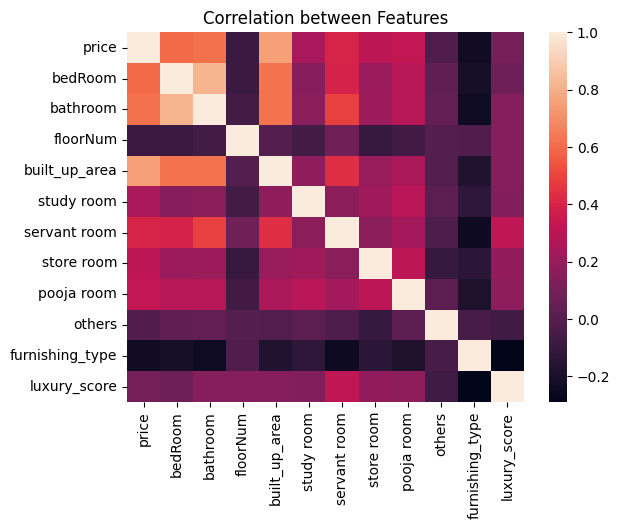

In [9]:
# checking correlatin between the features
sns.heatmap(train_df.select_dtypes(exclude='object').corr())
plt.title('Correlation between Features')
plt.show()

In [10]:
# checking correlation of features with price column
train_df.select_dtypes(exclude='object').corr()['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.750498
bathroom           0.615960
bedRoom            0.598475
servant room       0.399023
pooja room         0.328097
store room         0.311013
study room         0.246688
luxury_score       0.096372
others            -0.019733
floorNum          -0.089836
furnishing_type   -0.229362
Name: price, dtype: float64

Observations: -
- There is strong positive correlation between price and built_up_area
- Price is showing negative correlation with floorNum and furnishing_type which means that variation in property pricing is not dependent on the floor number or the furnishing type.

**`luxury_score` column**

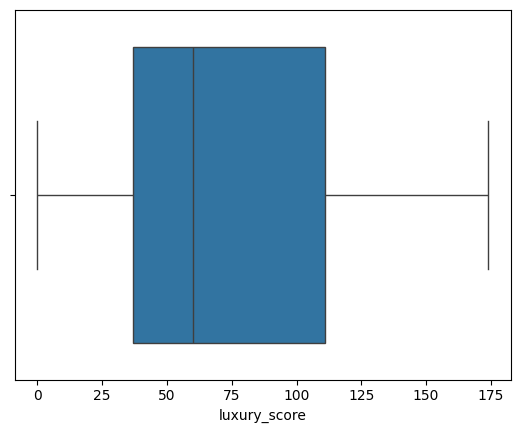

In [11]:
sns.boxplot(x=df['luxury_score'])
plt.show()

In [15]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [16]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [17]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.29,9021.0,3,3,3,7.0,Relatively New,1540.0,1,0,0,0,0,2,174
1,flat,ireo the grand arch,sector 58,2.20,16000.0,2,2,1,5.0,Relatively New,1528.0,0,0,0,1,0,1,49
2,flat,ireo victory valley,sector 67,2.95,12110.0,3,3,3+,14.0,Moderately Old,2236.0,0,1,0,1,0,1,165
3,flat,puri emerald bay,sector 104,2.23,9911.0,3,4,3+,10.0,Relatively New,2360.0,0,1,0,0,0,1,159
4,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,Relatively New,1548.0,0,0,0,0,0,2,0


**`floorNum` column**

<Axes: xlabel='floorNum'>

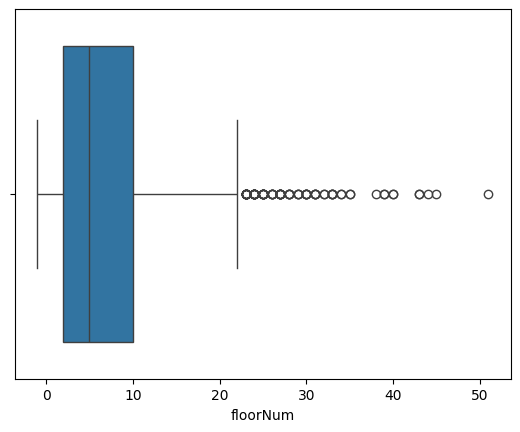

In [18]:
sns.boxplot(x=df['floorNum'])

In [19]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [20]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [21]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 90,1.29,3,3,3,7.0,Relatively New,1540.0,1,0,0,0,0,2,174,High,Mid Floor
1,flat,sector 58,2.20,2,2,1,5.0,Relatively New,1528.0,0,0,0,1,0,1,49,Low,Mid Floor
2,flat,sector 67,2.95,3,3,3+,14.0,Moderately Old,2236.0,0,1,0,1,0,1,165,High,High Floor
3,flat,sector 104,2.23,3,4,3+,10.0,Relatively New,2360.0,0,1,0,0,0,1,159,High,Mid Floor
4,flat,sector 108,0.70,2,2,3,1.0,Relatively New,1548.0,0,0,0,0,0,2,0,Low,Low Floor


In [22]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [23]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 90,1.29,3,3,3,Relatively New,1540.0,1,0,0,0,0,2,High,Mid Floor
1,flat,sector 58,2.20,2,2,1,Relatively New,1528.0,0,0,0,1,0,1,Low,Mid Floor
2,flat,sector 67,2.95,3,3,3+,Moderately Old,2236.0,0,1,0,1,0,1,High,High Floor
3,flat,sector 104,2.23,3,4,3+,Relatively New,2360.0,0,1,0,0,0,1,High,Mid Floor
4,flat,sector 108,0.70,2,2,3,Relatively New,1548.0,0,0,0,0,0,2,Low,Low Floor


In [24]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [25]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,103.0,3,3,3.0,3.0,1540.0,1,0,0,0,0,2,0.0,2.0
1,0.0,65.0,2,2,1.0,3.0,1528.0,0,0,0,1,0,1,1.0,2.0
2,0.0,75.0,3,3,4.0,0.0,2236.0,0,1,0,1,0,1,0.0,0.0
3,0.0,6.0,3,4,4.0,3.0,2360.0,0,1,0,0,0,1,0.0,2.0
4,0.0,10.0,2,2,3.0,3.0,1548.0,0,0,0,0,0,2,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,0.0,33.0,2,1,1.0,2.0,1188.0,0,0,0,0,0,2,2.0,1.0
3599,0.0,111.0,2,2,3.0,1.0,1223.0,1,0,0,0,0,2,2.0,1.0
3600,0.0,99.0,3,3,4.0,1.0,1676.0,0,0,0,0,0,2,1.0,0.0
3601,0.0,78.0,3,3,2.0,3.0,1429.0,0,0,0,1,0,2,2.0,2.0


In [26]:
y_label

0       1.29
1       2.20
2       2.95
3       2.23
4       0.70
        ... 
3598    0.95
3599    0.91
3600    1.50
3601    1.55
3602    0.78
Name: price, Length: 3603, dtype: float64

#### **Technique-1 (Correlation Analysis)**

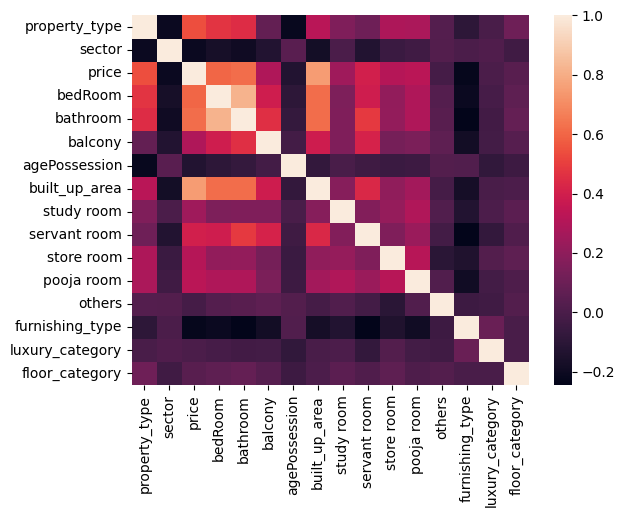

In [28]:
sns.heatmap(data_label_encoded.corr())
plt.show()

In [29]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.209847
1,price,1.000000
2,bedRoom,0.598475
3,bathroom,0.615960
4,balcony,0.291508
5,agePossession,-0.130831
6,built_up_area,0.750498
7,study room,0.246688
8,servant room,0.399023
9,store room,0.311013


#### **Technique-2 (Random Forest Feature Importance)**

In [30]:

from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.646553
0,property_type,0.111831
1,sector,0.107884
3,bathroom,0.024130
2,bedRoom,0.023924
8,servant room,0.015193
5,agePossession,0.014281
4,balcony,0.011155
12,furnishing_type,0.010352
7,study room,0.007177


#### **Technique-3 (Gradient Boosting Feature Importance)**

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.690599
0,property_type,0.115530
1,sector,0.093245
2,bedRoom,0.037373
3,bathroom,0.026195
8,servant room,0.019899
9,store room,0.005320
5,agePossession,0.003402
12,furnishing_type,0.003144
7,study room,0.002781


#### **Technique-4 (Permutation Importance)**

In [32]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4


,feature,permutation_importance
6,built_up_area,0.729208
1,sector,0.214487
0,property_type,0.208950
3,bathroom,0.027415
8,servant room,0.019031
2,bedRoom,0.017546
5,agePossession,0.005637
7,study room,0.004193
14,floor_category,0.002020
11,others,-0.000263


#### **Technique-5 (LASSO)**

In [33]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.511657
0,property_type,0.738380
3,bathroom,0.261303
9,store room,0.179968
7,study room,0.164542
8,servant room,0.154268
10,pooja room,0.061540
13,luxury_category,0.033296
2,bedRoom,0.002731
14,floor_category,-0.011952


#### **Technique-6 (RFE)**

In [34]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.642508
0,property_type,0.116187
1,sector,0.107227
3,bathroom,0.025531
2,bedRoom,0.022290
8,servant room,0.014272
5,agePossession,0.014033
4,balcony,0.010829
12,furnishing_type,0.010468
7,study room,0.008017


#### **Technique-7 (Linear Regression Weights)**

In [36]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.514092
0,property_type,0.737702
3,bathroom,0.268670
9,store room,0.184019
7,study room,0.172720
8,servant room,0.162768
10,pooja room,0.064130
13,luxury_category,0.043625
2,bedRoom,0.005163
14,floor_category,-0.023150


In [53]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [54]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.209847,0.107884,0.093245,0.214487,-0.074384,0.107227,-0.083792
bedRoom,0.598475,0.023924,0.037373,0.017546,0.002731,0.022290,0.005163
bathroom,0.615960,0.024130,0.026195,0.027415,0.261303,0.025531,0.268670
balcony,0.291508,0.011155,0.001496,-0.002163,-0.095024,0.010829,-0.117852
agePossession,-0.130831,0.014281,0.003402,0.005637,-0.027664,0.014033,-0.035623
built_up_area,0.750498,0.646553,0.690599,0.729208,1.511657,0.642508,1.514092
study room,0.246688,0.007177,0.002781,0.004193,0.164542,0.008017,0.172720
servant room,0.399023,0.015193,0.019899,0.019031,0.154268,0.014272,0.162768
store room,0.311013,0.006615,0.005320,-0.002636,0.179968,0.006179,0.184019


In [55]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [57]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.739097
sector             0.140046
bathroom           0.028192
bedRoom            0.027938
servant room       0.018640
agePossession      0.010344
furnishing_type    0.006645
study room         0.006110
balcony            0.006091
store room         0.004462
luxury_category    0.003946
floor_category     0.003943
pooja room         0.002927
others             0.001619
dtype: float64

In [58]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,103.0,3,3,3.0,3.0,1540.0,1,0,0,0,0,2,0.0,2.0
1,0.0,65.0,2,2,1.0,3.0,1528.0,0,0,0,1,0,1,1.0,2.0
2,0.0,75.0,3,3,4.0,0.0,2236.0,0,1,0,1,0,1,0.0,0.0
3,0.0,6.0,3,4,4.0,3.0,2360.0,0,1,0,0,0,1,0.0,2.0
4,0.0,10.0,2,2,3.0,3.0,1548.0,0,0,0,0,0,2,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,0.0,33.0,2,1,1.0,2.0,1188.0,0,0,0,0,0,2,2.0,1.0
3599,0.0,111.0,2,2,3.0,1.0,1223.0,1,0,0,0,0,2,2.0,1.0
3600,0.0,99.0,3,3,4.0,1.0,1676.0,0,0,0,0,0,2,1.0,0.0
3601,0.0,78.0,3,3,2.0,3.0,1429.0,0,0,0,1,0,2,2.0,2.0


In [59]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [60]:
scores.mean()

np.float64(0.8141145430364756)

In [61]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [62]:
scores.mean()

np.float64(0.815839832772445)

In [63]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [64]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,103.0,3,3,3.0,3.0,1540.0,0,0,2,0.0,2.0,1.29
1,0.0,65.0,2,2,1.0,3.0,1528.0,0,0,1,1.0,2.0,2.20
2,0.0,75.0,3,3,4.0,0.0,2236.0,1,0,1,0.0,0.0,2.95
3,0.0,6.0,3,4,4.0,3.0,2360.0,1,0,1,0.0,2.0,2.23
4,0.0,10.0,2,2,3.0,3.0,1548.0,0,0,2,1.0,1.0,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,0.0,33.0,2,1,1.0,2.0,1188.0,0,0,2,2.0,1.0,0.95
3599,0.0,111.0,2,2,3.0,1.0,1223.0,0,0,2,2.0,1.0,0.91
3600,0.0,99.0,3,3,4.0,1.0,1676.0,0,0,2,1.0,0.0,1.50
3601,0.0,78.0,3,3,2.0,3.0,1429.0,0,0,2,2.0,2.0,1.55


In [65]:
export_df.to_csv('../data/gurgaon_properties_post_feature_selection.csv', index=False)